In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def ew2py(fileName):
    """
        Reads EasyWave binary output into numpy arrays. 
        Works for .ssh and .sshmax files (at least).
        
        Example usage:

        lon, lat, h = ew2py(fileName)    
        plt.pcolormesh(lon,lat,h)
    """
    import struct
    from numpy import zeros, linspace

    f = open(fileName, 'rb')
    dsbb = f.read(4)

    nOutI = struct.unpack('h',f.read(2))[0]
    nOutJ = struct.unpack('h',f.read(2))[0]
    
    lonOutMin = struct.unpack('d',f.read(8))[0]
    lonOutMax = struct.unpack('d',f.read(8))[0]
    latOutMin = struct.unpack('d',f.read(8))[0]
    latOutMax = struct.unpack('d',f.read(8))[0]
    
    tmp = f.read(8)
    tmp = f.read(8)

    lon = linspace(lonOutMin,lonOutMax,nOutI)
    lat = linspace(latOutMin,latOutMax,nOutJ)
    values = zeros((nOutJ,nOutI))

    for j in range(nOutJ):
        for i in range(nOutI):
            value = f.read(4)
            value = struct.unpack('f',value)[0]
            values[j,i] = value
    return lon, lat, values

In [6]:
ew = np.loadtxt('../easywave/eWave.poi.ssh',skiprows=1)

In [38]:
lon,lat,ew2d = ew2py('../easywave/eWave.2D.00000.ssh')

In [90]:
72000/1800

40.0

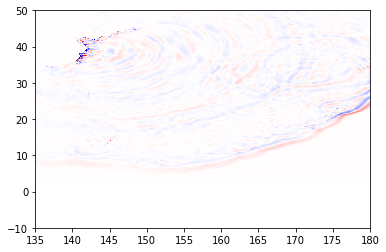

In [92]:
from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

p = ax.pcolormesh(lon,lat,ew2d[:-1,:-1],vmax=4.0,vmin=-4.0,cmap=plt.cm.seismic)
ax.set_xlim(135,180)
ax.set_ylim(-10,50)

# animation function. This is called sequentially
def animate(i):
    lon,lat,ew2d = ew2py('../easywave/eWave.2D.{:05d}.ssh'.format(i*1800))
    ax.pcolormesh(lon,lat,ew2d,vmax=4.0,vmin=-4.0,cmap=plt.cm.seismic)
    return p,

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=range(10), interval=200, blit=True)

HTML(anim.to_html5_video())

In [93]:
anim = animation.FuncAnimation(fig, animate, frames=range(10,20), interval=200, blit=True)

HTML(anim.to_html5_video())

/home/tsunamilab/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)
